In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### 0.3 Experiments with Perceptron Learning Algorithm
#### Ex: 1
Generate a data set of size 20 as directed by Exercise 1.4 of LFD, and plot the examples {($x_n$, $y_n$)} as well as the target function f on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.

In [38]:
# Function for generating random data.
def generate_data(n, seed):
    np.random.seed(seed) # Introduce seed in order to fix the randomizer.
    X = np.random.rand(n,2) # Generate random numbers from a uniform normal distribution.
    return X

In [39]:
# Simple target function.
def f_x(x):
    return -x+1

In [40]:
# Function for classifying the data points.
def classify(data):
    labels = [] # A list to keep the labels.
    for xi in data:
        if (xi[1] > f_x(xi[0])):
            labels.append(1)
        else:
            labels.append(-1)
    labels_array = np.array(labels) 
    data = np.insert(data, 2, labels_array, axis=1) # Adding labels to the existing array of data.
    
    return data

In [41]:
# Function for adding an artificial column X0 in our data.
def add_ones(data):
    np_ones = np.ones((data.shape[0],1))
    data = np.append(np_ones, data, axis=1)
    return data

In [42]:
# PLA implementation.
def pla(data, max_iter):
    d = data.shape[1]-1 # Subtract 1 because the number of columns will start from 0, not 1.
    w = np.zeros((d,1)) # Initializing weights to be a zero vector.
    count = 0 # Set a counter for the number of updates.
    
    for i in range(1, max_iter):
        misclassified = 0 # The number of misclassified labels left.
        pla_labels = [] # A list to keep the labels generated by PLA.
        for row in data:
            xi = row[0:d].reshape(-1,1) # [X0,X1,X2]
            yi = row[d] # Labels.
            if (np.sign(np.dot(w.T,xi)) != yi): # Checking whether h(x) predicted the true label correctly.
                w = w+yi*xi # Update the weights.
                count += 1
                misclassified += 1
            
            pla_labels.append(int(np.sign(np.dot(w.T,xi)))) # Write down the labels that were generated by PLA to a list.
        
        if misclassified == 0: # Condition which will stop the loop when PLA will learn to predict all labels correctly.
            print("All labels were matched!")
            break
        
    pla_labels_array = np.array(pla_labels)
    data = np.insert(data, d+1, pla_labels_array, axis=1) # Adding PLA labels to our array of data.
    
    # Creating a dataframe out of the final array in order to visualize the table.
    df = pd.DataFrame({"X0":data[:,0],
                       "X1":data[:,1],
                       "X2":data[:,2],
                       "Label":data[:,3],
                       "PLA":data[:,4]})
    
    return (df, count, w)

In [47]:
# Randomly generate 20 points.
rand_data_1 = generate_data(20, seed=42)
data_1 = classify(rand_data_1)

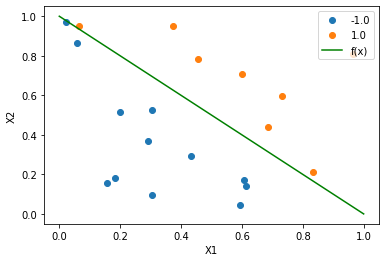

In [48]:
# Visualization of the target function f(x) and the generated points.
df_data = pd.DataFrame({"X1":data_1[:,0],
                        "X2":data_1[:,1],
                        "Label":data_1[:,2]})

groups = df_data.groupby("Label")
for name, group in groups:
    plt.plot(group["X1"], group["X2"], marker = "o", linestyle="", label=name)

x = np.linspace(0,1,100)
plt.plot(x,f_x(x),color='g',label='f(x)')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='upper right')
plt.show()

#### Ex 2: 
Run Perceptron Learning Algorithm (PLA) on the data set above. Report the number of updates that PLA takes before converging. Plot the examples {($x_n$,$y_n$)}, the target function f , and the final hypothesis g in the same figure. Comment on whether f is close to g.

In [49]:
data_1 = add_ones(data_1)

In [50]:
df_data_pla_1, iterations_1, w_1 = pla(data_1, max_iter=1000)

All labels were matched!


In [51]:
# As we can see from the table PLA correctly identified all labels.
df_data_pla_1

,X0,X1,X2,Label,PLA
0,1.0,0.374540,0.950714,1.0,1.0
1,1.0,0.731994,0.598658,1.0,1.0
2,1.0,0.156019,0.155995,-1.0,-1.0
3,1.0,0.058084,0.866176,-1.0,-1.0
4,1.0,0.601115,0.708073,1.0,1.0
5,1.0,0.020584,0.969910,-1.0,-1.0
6,1.0,0.832443,0.212339,1.0,1.0
7,1.0,0.181825,0.183405,-1.0,-1.0
8,1.0,0.304242,0.524756,-1.0,-1.0
9,1.0,0.431945,0.291229,-1.0,-1.0


In [52]:
# The number of iterations.
iterations_1

61

In [53]:
# Updated weights.
w_1

array([[-3.        ],
       [ 3.65738461],
       [ 2.93347552]])

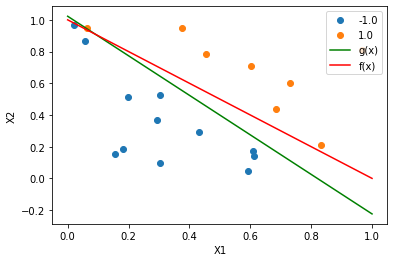

In [54]:
# Visualization of both g(x) and f(x) functions.
groups_pla_1 = df_data_pla_1.groupby("Label")
for name_pla_1, group_pla_1 in groups_pla_1:
    plt.plot(group_pla_1["X1"], group_pla_1["X2"], marker = "o", linestyle="", label=name_pla_1)

x = np.linspace(0,1,100).reshape(-1,1)
g_x = -(w_1[0]+w_1[1]*x)/w_1[2]

plt.plot(x,g_x,color='g',label='g(x)')
plt.plot(x,f_x(x),color='r',label='f(x)')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='upper right')
plt.show()

It took 61 updates for a PLA to converge. As it can be seen from the plot, g(x) is not very close to our target function f(x), however it still classifies the data correctly. After trial and error, it was concluded that if we initialize our weight to the vector of ones, it takes much less updates for a PLA to get to the correct g(x), and visually it becomes much closer to the target function.

#### Ex 3: 
Repeat everything in (2) with another randomly generated data set of size 20. Compare your results with (2).

In [65]:
rand_data_2 = generate_data(20, seed=5)
data_2 = classify(rand_data_2)
data_2 = add_ones(data_2)

In [66]:
df_data_pla_2, iterations_2, w_2 = pla(data_2, max_iter=1000)

All labels were matched!


In [67]:
# As we can see from the table PLA correctly identified all labels.
df_data_pla_2

,X0,X1,X2,Label,PLA
0,1.0,0.221993,0.870732,1.0,1.0
1,1.0,0.206719,0.918611,1.0,1.0
2,1.0,0.488411,0.611744,1.0,1.0
3,1.0,0.765908,0.518418,1.0,1.0
4,1.0,0.296801,0.187721,-1.0,-1.0
5,1.0,0.080741,0.738440,-1.0,-1.0
6,1.0,0.441309,0.158310,-1.0,-1.0
7,1.0,0.879937,0.274086,1.0,1.0
8,1.0,0.414235,0.296080,-1.0,-1.0
9,1.0,0.628788,0.579838,1.0,1.0


In [68]:
# The number of iterations.
iterations_2

22

In [69]:
# Updated weights.
w_2

array([[-2.        ],
       [ 1.91489312],
       [ 1.94653509]])

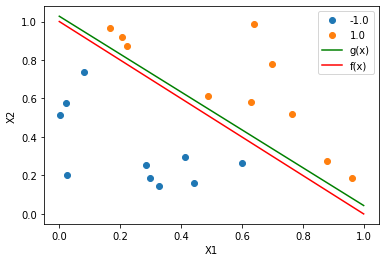

In [70]:
# Visualization of both g(x) and f(x) functions.
groups_pla_2 = df_data_pla_2.groupby("Label")
for name_pla_2, group_pla_2 in groups_pla_2:
    plt.plot(group_pla_2["X1"], group_pla_2["X2"], marker = "o", linestyle="", label=name_pla_2)

x = np.linspace(0,1,100)
g_x = -(w_2[0]+w_2[1]*x)/w_2[2]

plt.plot(x,g_x,color='g',label='g(x)')
plt.plot(x,f_x(x),color='r',label='f(x)')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='upper right')
plt.show()

It took 22 updates for a PLA to converge. From the plot, it can be noticed that g(x) is very close to our target function f(x) compared to the previous dataset.

#### Ex 4: 
Repeat everything in (2) with another randomly generated data set of size 100. Compare your results with (2).

In [71]:
rand_data_3 = generate_data(100, seed=56)
data_3 = classify(rand_data_3)
data_3 = add_ones(data_3)

In [72]:
df_data_pla_3, iterations_3, w_3 = pla(data_3, max_iter=1000)

All labels were matched!


In [73]:
# As we can see from the table PLA correctly identified all labels.
df_data_pla_3

,X0,X1,X2,Label,PLA
0,1.0,0.984192,0.333412,1.0,1.0
1,1.0,0.673702,0.196390,-1.0,-1.0
2,1.0,0.354446,0.813366,1.0,1.0
3,1.0,0.247850,0.458611,-1.0,-1.0
4,1.0,0.877301,0.391658,1.0,1.0
...,...,...,...,...,...
95,1.0,0.111489,0.186685,-1.0,-1.0
96,1.0,0.533730,0.474820,1.0,1.0
97,1.0,0.909879,0.978251,1.0,1.0
98,1.0,0.046860,0.040996,-1.0,-1.0


In [74]:
# The number of iterations.
iterations_3

275

In [75]:
# Updated weights.
w_3

array([[-9.        ],
       [ 9.30814197],
       [ 8.92740503]])

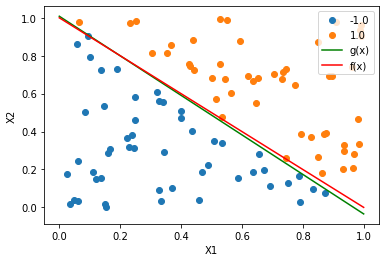

In [76]:
# Visualization of both g(x) and f(x) functions.
groups_pla_3 = df_data_pla_3.groupby("Label")
for name_pla_3, group_pla_3 in groups_pla_3:
    plt.plot(group_pla_3["X1"], group_pla_3["X2"], marker = "o", linestyle="", label=name_pla_3)

x = np.linspace(0,1,100)

g_x = -(w_3[0]+w_3[1]*x)/w_3[2]

plt.plot(x,g_x,color='g',label='g(x)')
plt.plot(x,f_x(x),color='r',label='f(x)')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='upper right')
plt.show()

It took 275 updates for a PLA to converge. From the plot, g(x) is almost the same as f(x). If we compare the results with the previous cases, we can notice that the number of updates increased significantly. This is probably due to the increased number of data points.

#### Ex 5:
Repeat everything in (2) with another randomly generated data set of size 1000. Compare your results with (2).

In [77]:
rand_data_4 = generate_data(100, seed=43)
data_4 = classify(rand_data_4)
data_4 = add_ones(data_4)

In [78]:
df_data_pla_4, iterations_4, w_4 = pla(data_4, max_iter=1000)

All labels were matched!


In [79]:
# As we can see from the table PLA correctly identified all labels.
df_data_pla_4

,X0,X1,X2,Label,PLA
0,1.0,0.115055,0.609067,-1.0,-1.0
1,1.0,0.133391,0.240590,-1.0,-1.0
2,1.0,0.327139,0.859137,1.0,1.0
3,1.0,0.666090,0.541162,1.0,1.0
4,1.0,0.029014,0.733748,-1.0,-1.0
...,...,...,...,...,...
95,1.0,0.601059,0.160035,-1.0,-1.0
96,1.0,0.826578,0.332702,1.0,1.0
97,1.0,0.546697,0.830711,1.0,1.0
98,1.0,0.969067,0.327535,1.0,1.0


In [80]:
# The number of iterations.
iterations_4

142

In [81]:
# Updated weights.
w_4

array([[-6.        ],
       [ 5.95489118],
       [ 5.9625798 ]])

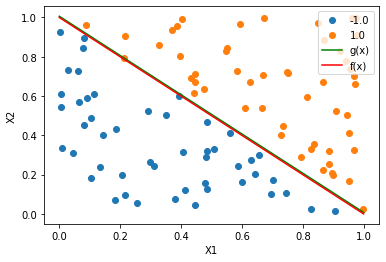

In [82]:
# Visualization of both g(x) and f(x) functions.
groups_pla_4 = df_data_pla_4.groupby("Label")
for name_pla_4, group_pla_4 in groups_pla_4:
    plt.plot(group_pla_4["X1"], group_pla_4["X2"], marker = "o", linestyle="", label=name_pla_4)

x = np.linspace(0,1,100)

g_x = -(w_4[0]+w_4[1]*x)/w_4[2]

plt.plot(x,g_x,color='g',label='g(x)')
plt.plot(x,f_x(x),color='r',label='f(x)')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc='upper right')
plt.show()

It took 142 updates for a PLA to converge. From the plot, g(x) is almost the same as f(x). It also took much larger number of updates to predict all the labels correctly, which is probably also due to the number of data points.